In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
history = pd.read_csv("./data/Attn_history.csv")


loss = history["loss"]
recall_1 = history["recall@1"]
recall_5 = history["recall@5"]
recall_10 = history["recall@10"]
alignment = history["alignment"]
uniformnity = history["uniformnity"]

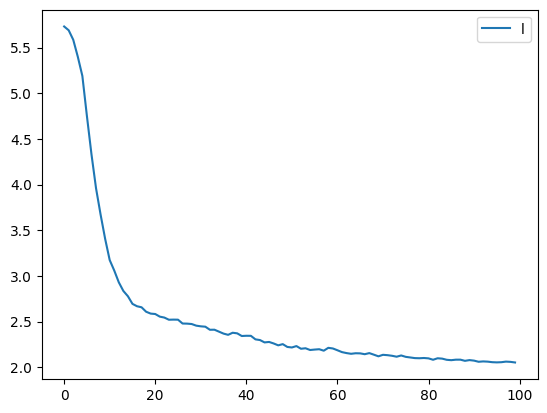

In [7]:
plt.plot(loss)
plt.legend("loss_history")

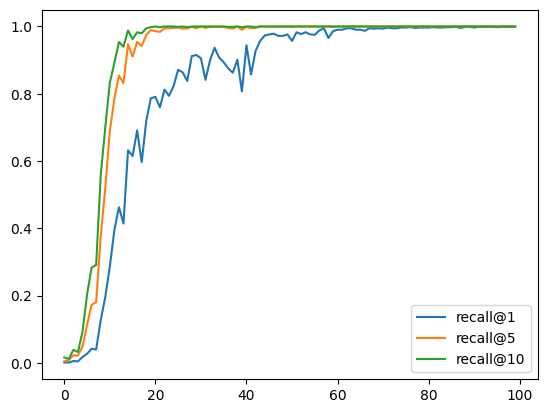

In [ ]:
plt.plot(recall_1)
plt.plot(recall_5)
plt.plot(recall_10)
plt.legend(["recall@1", "recall@5", "recall@10"])

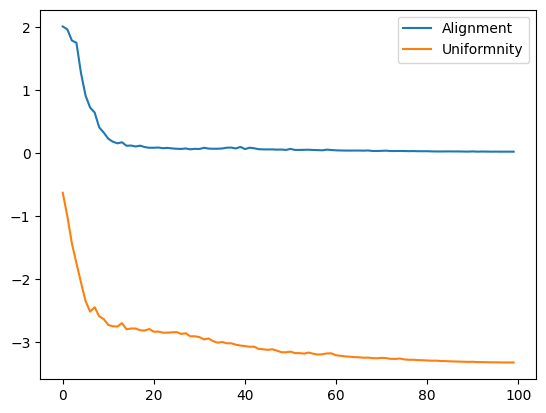

In [9]:
plt.plot(alignment)
plt.plot(uniformnity)
plt.legend(["Alignment", "Uniformnity"])